<a href="https://colab.research.google.com/github/hhant-max/22SpringCourses/blob/main/IR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade python-terrier

     |████████████████████████████████| 97 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 30.0 MB/s 
     |████████████████████████████████| 69 kB 5.2 MB/s 
     |████████████████████████████████| 255 kB 35.6 MB/s 
     |████████████████████████████████| 41 kB 315 kB/s 
     |████████████████████████████████| 294 kB 48.6 MB/s 
     |████████████████████████████████| 72 kB 1.6 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 6.4 MB 39.8 MB/s 
     |████████████████████████████████| 126 kB 45.0 MB/s 
     |████████████████████████████████| 291 kB 48.3 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.0-py3-none-any.whl size=103883 sha256=780588e5bc437fbe2b6c12aeca22d2b575aca1bbe30b4ffcd82f75f7440dd523
  Stored in directory: /root/.cac

In [ ]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert


  Cloning https://github.com/terrierteam/pyterrier_colbert to /tmp/pip-req-build-e2xfwcgc
  Running command git clone -q https://github.com/terrierteam/pyterrier_colbert /tmp/pip-req-build-e2xfwcgc
  Cloning https://github.com/cmacdonald/ColBERT.git (to revision v0.2) to /tmp/pip-install-x9v_0aj5/colbert_a75510b9a027470c8577993e2bb7a7b8
  Running command git clone -q https://github.com/cmacdonald/ColBERT.git /tmp/pip-install-x9v_0aj5/colbert_a75510b9a027470c8577993e2bb7a7b8
  Running command git checkout -b v0.2 --track origin/v0.2
  Switched to a new branch 'v0.2'
  Branch 'v0.2' set up to track remote branch 'v0.2' from 'origin'.
     |████████████████████████████████| 769 kB 4.3 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 16.5 MB 22.5 MB/s 
     |████████████████████████████████| 3.0 MB 32.4 MB/s 
     |████████████████████████████████| 1.2 MB 29.9 MB/s 
     |████████████████████████████████| 895 kB 36.7 MB/s 
     |████████

In [ ]:
import pyterrier as pt
if not pt.started():
    pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
dataset = pt.datasets.get_dataset('irds:cord19/trec-covid')
topics = dataset.get_topics(variant='description')
qrels = dataset.get_qrels()

[INFO] [starting] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml
[INFO] [finished] https://ir.nist.gov/covidSubmit/data/topics-rnd5.xml: [00:00] [18.7kB] [6.87MB/s]
/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:433: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)
[INFO] [starting] https://ir.nist.gov/covidSubmit/data/qrels-covid_d5_j0.5-5.txt
[INFO] [finished] https://ir.nist.gov/covidSubmit/data/qrels-covid_d5_j0.5-5.txt: [00:00] [1.14MB] [1.28MB/s]


In [ ]:
import os

if not os.path.exists("terrier_index.zip"):
  !wget http://www.dcs.gla.ac.uk/~craigm/ecir2021-tutorial/terrier_index.zip
  !unzip -j terrier_index.zip -d terrier_index

# index is object
index_ref = pt.IndexRef.of("./terrier_index/data.properties")
index = pt.IndexFactory.of(index_ref)

--2022-03-20 12:42:55--  http://www.dcs.gla.ac.uk/~craigm/ecir2021-tutorial/terrier_index.zip
Resolving www.dcs.gla.ac.uk (www.dcs.gla.ac.uk)... 130.209.240.1
Connecting to www.dcs.gla.ac.uk (www.dcs.gla.ac.uk)|130.209.240.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42017186 (40M) [application/zip]
Saving to: ‘terrier_index.zip’

terrier_index.zip   100%[===================>]  40.07M  7.80MB/s    in 5.4s    

2022-03-20 12:43:01 (7.44 MB/s) - ‘terrier_index.zip’ saved [42017186/42017186]

Archive:  terrier_index.zip
  inflating: terrier_index/data.lexicon.fsomapfile  
  inflating: terrier_index/data.properties  
  inflating: terrier_index/data.lexicon.fsomaphash  
  inflating: terrier_index/data.lexicon.fsomapid  
  inflating: terrier_index/data.meta.idx  
  inflating: terrier_index/data.direct.bf  
  inflating: terrier_index/data.inverted.bf  
  inflating: terrier_index/data.meta.zdata  
  inflating: terrier_index/data.document.fsarrayfile  


In [ ]:
print(index)

<org.terrier.structures.Index at 0x7ff8d79e3e30 jclass=org/terrier/structures/Index jself=<LocalRef obj=0x55745fb84448 at 0x7ff8d87b2030>>


In [ ]:
import pyterrier_colbert.ranking
colbert_factory = pyterrier_colbert.ranking.ColBERTFactory(
    "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip", None, None)
colbert = colbert_factory.text_scorer(doc_attr='abstract')

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Mar 20, 12:43:42] #> Loading model checkpoint.
[Mar 20, 12:43:42] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


Downloading: "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip" to /root/.cache/torch/hub/checkpoints/colbert.dnn.zip


  0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:513: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Mar 20, 12:45:38] #> checkpoint['epoch'] = 0
[Mar 20, 12:45:38] #> checkpoint['batch'] = 44500


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:486: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:506: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")


## colbet

In [ ]:
br = pt.BatchRetrieve(index) % 100
pipeline = br >> pt.text.get_text(dataset, 'abstract') >> colbert
pt.Experiment(
    [br, pipeline],
    topics,
    qrels,
    names=['DPH', 'DPH >> ColBERT'],
    eval_metrics=["map", "ndcg", 'ndcg_cut.10', 'P.10', 'mrt']
)

[INFO] [starting] building docstore
[INFO] If you have a local copy of https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/80d664e496b8b7e50a39c6f6bb92e0ef
[INFO] [starting] https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv
docs_iter:   0%|                                    | 0/192509 [00:00<?, ?doc/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 0.00/269M [00:00<?, ?B/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 16.4k/269M [00:00<30:31, 147kB/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 65.5k/269M [00:00<16:43, 268kB/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 115k/269M [00:00<14:44, 304kB/s] 
https://ai2-semanticscholar-cord-1

,name,map,ndcg,ndcg_cut.10,P.10,mrt
0,DPH,0.068056,0.165653,0.609058,0.658,106.935150
1,DPH >> ColBERT,0.074722,0.172074,0.689785,0.750,5032.407918


In [ ]:
# visualize
res = pipeline(topics.iloc[:1])
res.merge(dataset.get_qrels(), how='left').head()

,qid,query,docno,score,rank,label,iteration
0,1,what is the origin of covid 19,4dtk1kyh,24.868294,0,2.0,3
1,1,what is the origin of covid 19,jwxt4ygt,23.810736,1,2.0,3.5
2,1,what is the origin of covid 19,bn7hsuv9,23.810736,2,2.0,3.5
3,1,what is the origin of covid 19,8a6flxl6,23.698730,3,NaN,NaN
4,1,what is the origin of covid 19,6ck2ntid,23.698730,4,NaN,NaN


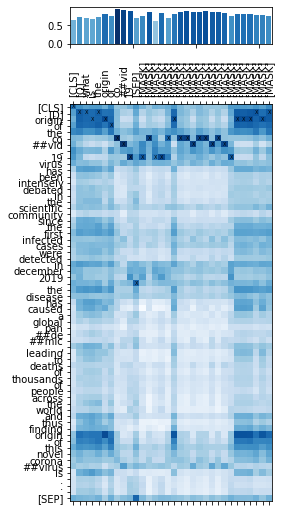

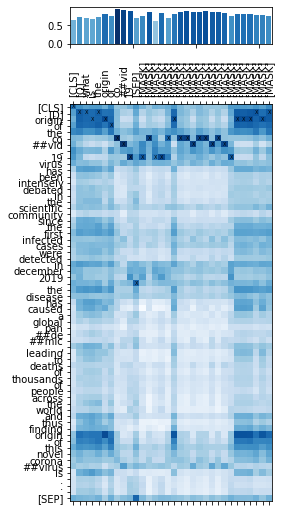

In [ ]:
text = dataset.irds_ref().docs_store().get('4dtk1kyh').abstract[:300] + '...' # truncate text
colbert_factory.explain_text('what is the origin of covid 19', text)

## change for BM2.5

In [ ]:
# 这句话到底什么意思
#br = pt.BatchRetrieve(index) % 100
bm25 = pt.BatchRetrieve(index, wmodel="BM25") % 100
pipeline_BM = bm25 >> pt.text.get_text(dataset, 'abstract') >> colbert
pt.Experiment(
    [bm25,pipeline_BM],
    topics,
    qrels,
    names=['bm2.5', 'bm2.5->colbert'],
    eval_metrics=["map", "ndcg", 'ndcg_cut.10', 'P.10', 'mrt']
)

# visualize

#text = dataset.irds_ref().docs_store().get('4dtk1kyh').abstract[:300] + '...' # truncate text
#colbert_factory.explain_text('what is the origin of covid 19', text)

[INFO] [starting] building docstore
[INFO] If you have a local copy of https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/80d664e496b8b7e50a39c6f6bb92e0ef
[INFO] [starting] https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv
docs_iter:   0%|                                    | 0/192509 [00:00<?, ?doc/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 0.00/269M [00:00<?, ?B/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 8.19k/269M [00:00<56:09, 79.9kB/s]
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 57.3k/269M [00:00<18:17, 245kB/s] 
https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-16/metadata.csv: 0.0%| 106k/269M [00:00<15:21, 292kB/s] 
https://ai2-semanticscholar-cord

,name,map,ndcg,ndcg_cut.10,P.10,mrt
0,bm2.5,0.077892,0.177767,0.644374,0.692,103.847462
1,bm2.5->colbert,0.081464,0.180423,0.666929,0.738,5059.781951


## topiccollection


In [ ]:
# print top 5 topics 
print(type(topics))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
topics.head(5)

,qid,query
0,1,what is the origin of covid 19
1,2,how does the coronavirus respond to changes in...
2,3,will sars cov2 infected people develop immunit...
3,4,what causes death from covid 19
4,5,what drugs have been active against sars cov o...


In [ ]:
topics_all = dataset.get_topics()
topics_all.head(5)

There are multiple query fields available: ('title', 'description', 'narrative'). To use with pyterrier, provide variant or modify dataframe to add query column.


,qid,title,description,narrative
0,1,coronavirus origin,what is the origin of COVID-19,seeking range of information about the SARS-Co...
1,2,coronavirus response to weather changes,how does the coronavirus respond to changes in...,seeking range of information about the SARS-Co...
2,3,coronavirus immunity,will SARS-CoV2 infected people develop immunit...,seeking studies of immunity developed due to i...
3,4,how do people die from the coronavirus,what causes death from Covid-19?,Studies looking at mechanisms of death from Co...
4,5,animal models of COVID-19,what drugs have been active against SARS-CoV o...,Papers that describe the results of testing d...


## per query

In [ ]:
from pyterrier.measures import *
import pandas as pd

br_ = pt.BatchRetrieve(index) % 100
pipeline_ = br_ >> pt.text.get_text(dataset, 'abstract') >> colbert
table_ = pt.Experiment(
    [br_, pipeline_],
    topics,
    qrels,
    names=['DPH', 'DPH >> ColBERT'],
    eval_metrics=[nDCG@10],
    perquery=True
)



In [ ]:
deal_with = table_
deal_with
lowest_nDCG = deal_with.sort_values(by=['value'],ascending=True).iloc[0]
highest_nDCG = deal_with.loc[deal_with['value']==1.0]

In [ ]:
# find the id of each
lowest_nDCG

print(lowest_nDCG.to_frame())

              14
name         DPH
qid           15
measure  nDCG@10
value        0.0


In [ ]:
topics.iloc[9:10]['query']




9    has social distancing had an impact on slowing...
Name: query, dtype: object

## for certain query

In [ ]:
# for lowest and highest 
def visual(mess):
  res = pipeline(mess)
  return res.merge(dataset.get_qrels(), how='left').head()



In [ ]:
# lowest
visual(topics.iloc[14:15])

,qid,query,docno,score,rank,label,iteration
0,15,how long can the coronavirus live outside the ...,959w9sln,25.048832,0,2.0,4
1,15,how long can the coronavirus live outside the ...,hgau3922,24.572117,1,0.0,0.5
2,15,how long can the coronavirus live outside the ...,memywn0w,20.267124,2,0.0,4.5
3,15,how long can the coronavirus live outside the ...,ucxin4ke,20.254128,3,NaN,NaN
4,15,how long can the coronavirus live outside the ...,yxtf8r2j,19.341217,4,NaN,NaN


In [ ]:
#highest
visual(topics.iloc[9:10])

,qid,query,docno,score,rank,label,iteration
0,10,has social distancing had an impact on slowing...,pn02p843,25.636879,0,2.0,5
1,10,has social distancing had an impact on slowing...,vfnpeuzr,25.472515,1,2.0,4
2,10,has social distancing had an impact on slowing...,lnv8yi9l,25.237114,2,2.0,2
3,10,has social distancing had an impact on slowing...,ocwetgv6,25.122652,3,1.0,2
4,10,has social distancing had an impact on slowing...,0b6dsdct,24.929298,4,1.0,4


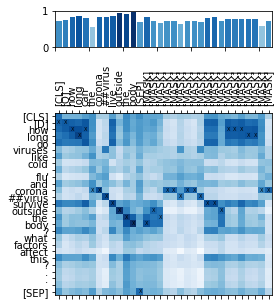

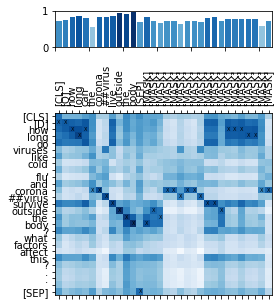

In [ ]:
# attention matrix for lowest
text = dataset.irds_ref().docs_store().get('959w9sln').abstract[:300] + '...' # truncate text
colbert_factory.explain_text('how long can the coronavirus live outside the body', text)

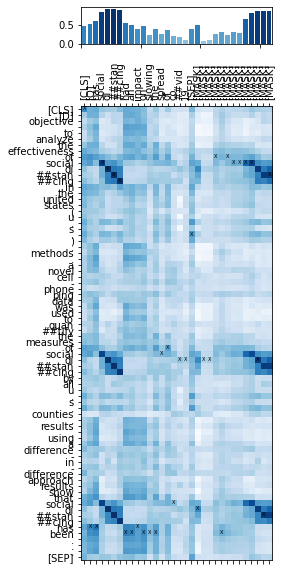

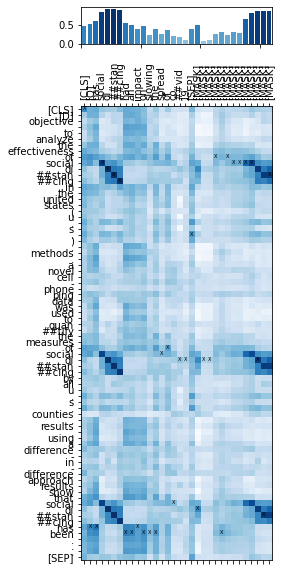

In [ ]:
text = dataset.irds_ref().docs_store().get('pn02p843').abstract[:300] + '...' # truncate text
colbert_factory.explain_text('has social distancing had an impact on slowing the spread of covid 19', text)